Graphing Examples
==============

In [306]:
from IPython.display import HTML

In [307]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [82]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import re
import os

In [83]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')#give a nice white grid background for visualizations
#plt.switch_backend('GTKAgg')
%matplotlib inline

In [84]:
location='C://Users/pmlef/Documents/Python_work/Python_for_Data_Analysis/GeoSpatial Data/data/'
df_det_trim=pd.read_csv(location+'detail_trim2.csv',na_values=".", encoding='utf-8')

In [85]:
df_det_trim.head()

,BEGIN_DATE_TIME,END_DATE_TIME,YEAR,MONTH_NAME,BEGIN_DAY,BEGIN_TIME,EPISODE_ID,EVENT_ID,STATE,CZ_TYPE,...,EVENT_REDUCED,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_LAT,BEGIN_LON
0,28-APR-50 14:45:00,28-APR-50 14:45:00,1950,April,28,1445,NaN,10096222,OKLAHOMA,C,...,Tornado,CST,0,0,0,0,250000.0,NaN,35.12,-99.20
1,29-APR-50 15:30:00,29-APR-50 15:30:00,1950,April,29,1530,NaN,10120412,TEXAS,C,...,Tornado,CST,0,0,0,0,25000.0,NaN,31.90,-98.60
2,05-JUL-50 18:00:00,05-JUL-50 18:00:00,1950,July,5,1800,NaN,10104927,PENNSYLVANIA,C,...,Tornado,CST,2,0,0,0,25000.0,NaN,40.58,-75.70
3,05-JUL-50 18:30:00,05-JUL-50 18:30:00,1950,July,5,1830,NaN,10104928,PENNSYLVANIA,C,...,Tornado,CST,0,0,0,0,2500.0,NaN,40.60,-76.75
4,24-JUL-50 14:40:00,24-JUL-50 14:40:00,1950,July,24,1440,NaN,10104929,PENNSYLVANIA,C,...,Tornado,CST,0,0,0,0,2500.0,NaN,41.63,-79.68


In [86]:
df_det_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471788 entries, 0 to 1471787
Data columns (total 21 columns):
BEGIN_DATE_TIME      1471788 non-null object
END_DATE_TIME        1471788 non-null object
YEAR                 1471788 non-null int64
MONTH_NAME           1471788 non-null object
BEGIN_DAY            1471788 non-null int64
BEGIN_TIME           1471788 non-null int64
EPISODE_ID           1239549 non-null float64
EVENT_ID             1471788 non-null int64
STATE                1471787 non-null object
CZ_TYPE              1471788 non-null object
EVENT_TYPE           1471788 non-null object
EVENT_REDUCED        1471788 non-null object
CZ_TIMEZONE          1471788 non-null object
INJURIES_DIRECT      1471788 non-null int64
INJURIES_INDIRECT    1471788 non-null int64
DEATHS_DIRECT        1471788 non-null int64
DEATHS_INDIRECT      1471788 non-null int64
DAMAGE_PROPERTY      975523 non-null float64
DAMAGE_CROPS         683088 non-null float64
BEGIN_LAT            910254 non-null fl

In [87]:
dmg_crops=df_det_trim['DAMAGE_CROPS']
dmg_prop=df_det_trim['DAMAGE_PROPERTY']

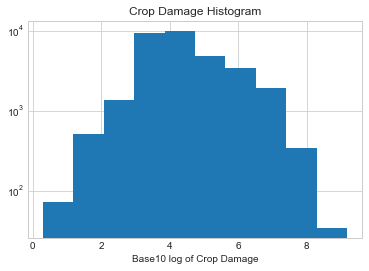

In [88]:
plt.hist(np.log10(dmg_crops[dmg_crops>0]),log=True)
plt.title('Crop Damage Histogram')
plt.xlabel('Base10 log of Crop Damage')
plt.show()

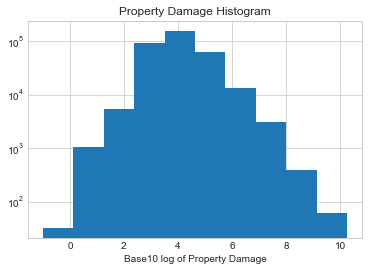

In [89]:
plt.hist(np.log10(dmg_prop[dmg_prop>0]),log=True)
plt.title('Property Damage Histogram')
plt.xlabel('Base10 log of Property Damage')
plt.show()

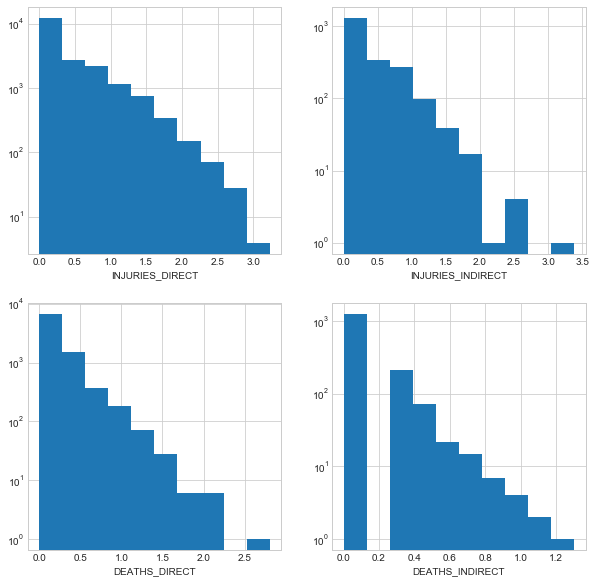

In [90]:
name_list=['INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT']
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    name=name_list[i]
    msk=df_det_trim[name]>0
    plt.hist(np.log10(df_det_trim.loc[msk,name]),log=True)
    plt.xlabel(name)

plt.show()

In [91]:
dfyear = df_det_trim.groupby(['YEAR'], as_index=False).sum()
dfyear['DAMAGE_PROPERTY']=(dfyear['DAMAGE_PROPERTY']/1000000)
dfyear.head()

,YEAR,BEGIN_DAY,BEGIN_TIME,EPISODE_ID,EVENT_ID,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_LAT,BEGIN_LON
0,1950,3202,314212,NaN,2242278541,659,0,70,0,34.48165,NaN,8082.38,-20646.45
1,1951,4464,435777,NaN,2704694739,524,0,34,0,65.50599,NaN,10102.02,-25335.46
2,1952,4637,413442,NaN,2734846526,1916,0,231,0,94.30224,NaN,10019.16,-24811.34
3,1953,6857,766693,NaN,4948760119,5131,0,519,0,596.10470,NaN,18425.51,-45633.11
4,1954,10364,907416,NaN,6125921867,715,0,36,0,85.80532,NaN,22554.09,-56320.36


In [92]:
df_det_trim['EVENT_TYPE']=df_det_trim['EVENT_TYPE'].str.lower()
df_det_trim['STATE']=df_det_trim['STATE'].str.lower()
df_det_trim['INJURIES']=df_det_trim['INJURIES_DIRECT']+df_det_trim['INJURIES_INDIRECT']
df_det_trim['DEATHS']=df_det_trim['DEATHS_DIRECT']+df_det_trim['DEATHS_INDIRECT']
df_det_trim['DAMAGE']=df_det_trim['DAMAGE_PROPERTY']+df_det_trim['DAMAGE_CROPS']
df_det_trim.head()

,BEGIN_DATE_TIME,END_DATE_TIME,YEAR,MONTH_NAME,BEGIN_DAY,BEGIN_TIME,EPISODE_ID,EVENT_ID,STATE,CZ_TYPE,...,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_LAT,BEGIN_LON,INJURIES,DEATHS,DAMAGE
0,28-APR-50 14:45:00,28-APR-50 14:45:00,1950,April,28,1445,NaN,10096222,oklahoma,C,...,0,0,0,250000.0,NaN,35.12,-99.20,0,0,NaN
1,29-APR-50 15:30:00,29-APR-50 15:30:00,1950,April,29,1530,NaN,10120412,texas,C,...,0,0,0,25000.0,NaN,31.90,-98.60,0,0,NaN
2,05-JUL-50 18:00:00,05-JUL-50 18:00:00,1950,July,5,1800,NaN,10104927,pennsylvania,C,...,0,0,0,25000.0,NaN,40.58,-75.70,2,0,NaN
3,05-JUL-50 18:30:00,05-JUL-50 18:30:00,1950,July,5,1830,NaN,10104928,pennsylvania,C,...,0,0,0,2500.0,NaN,40.60,-76.75,0,0,NaN
4,24-JUL-50 14:40:00,24-JUL-50 14:40:00,1950,July,24,1440,NaN,10104929,pennsylvania,C,...,0,0,0,2500.0,NaN,41.63,-79.68,0,0,NaN


In [93]:
MattsGraphDF=df_det_trim[df_det_trim['CZ_TYPE']!='M'][['STATE','EVENT_REDUCED','INJURIES','DEATHS','DAMAGE']].copy()
MattsGraphDF=MattsGraphDF.fillna(0)

In [94]:
MattsGraphDF['STATE'].unique()

array(['oklahoma', 'texas', 'pennsylvania', 'nebraska', 'mississippi',
       'new mexico', 'arkansas', 'missouri', 'connecticut', 'florida',
       'north carolina', 'alabama', 'kentucky', 'maryland', 'minnesota',
       'south dakota', 'iowa', 'louisiana', 'ohio', 'kansas',
       'north dakota', 'indiana', 'colorado', 'south carolina',
       'west virginia', 'wyoming', 'georgia', 'wisconsin', 'illinois',
       'tennessee', 'new jersey', 'michigan', 'california',
       'massachusetts', 'new hampshire', 'oregon', 'virginia', 'arizona',
       'new york', 'montana', 'maine', 'vermont', 'utah', 'delaware',
       'idaho', 'washington', 'hawaii', 'rhode island', 'nevada',
       'puerto rico', 'district of columbia', 'alaska', 'virgin islands',
       'guam', 'american samoa', 'gulf of mexico', 'atlantic north',
       'atlantic south', 'hawaii waters', 'lake michigan', 'e pacific',
       'lake huron', 'lake erie', 'lake ontario', 'lake superior',
       'lake st clair', 'gulf of ala

In [95]:
DropLIst=['gulf of mexico' , 'atlantic north' , 'atlantic south' , 'hawaii waters' , 'lake michigan' , 'e pacific' , 'lake huron' , 'lake erie' , 'lake ontario' , 'lake superior' , 'lake st clair' , 'gulf of alaska' , 'st lawrence r']
MattsGraphDF = MattsGraphDF[~MattsGraphDF['STATE'].isin(DropLIst)]

MattsGraphDF['STATE'].unique()

array(['oklahoma', 'texas', 'pennsylvania', 'nebraska', 'mississippi',
       'new mexico', 'arkansas', 'missouri', 'connecticut', 'florida',
       'north carolina', 'alabama', 'kentucky', 'maryland', 'minnesota',
       'south dakota', 'iowa', 'louisiana', 'ohio', 'kansas',
       'north dakota', 'indiana', 'colorado', 'south carolina',
       'west virginia', 'wyoming', 'georgia', 'wisconsin', 'illinois',
       'tennessee', 'new jersey', 'michigan', 'california',
       'massachusetts', 'new hampshire', 'oregon', 'virginia', 'arizona',
       'new york', 'montana', 'maine', 'vermont', 'utah', 'delaware',
       'idaho', 'washington', 'hawaii', 'rhode island', 'nevada',
       'puerto rico', 'district of columbia', 'alaska', 'virgin islands',
       'guam', 'american samoa'], dtype=object)

In [96]:
#MattsGraphDF.drop(['INJURIES_DIRECT','INJURIES_INDIRECT','DEATHS_DIRECT','DEATHS_INDIRECT'],axis=1)

In [97]:
MattsGraphDF['EVENT_REDUCED'].value_counts()

Wind              497741
Hail              351081
Winter Weather    159115
Flood             125285
Winter Storm       90296
Tornado            77228
Drought            52122
Heat               25443
Rain               21858
Lightning          15937
Waves/Surge         9583
Tropical Storm      6893
Wildfire/Smoke      6577
Other               2740
Debris Flow         1811
Name: EVENT_REDUCED, dtype: int64

In [98]:
MattsGraphDF.head()

,STATE,EVENT_REDUCED,INJURIES,DEATHS,DAMAGE
0,oklahoma,Tornado,0,0,0.0
1,texas,Tornado,0,0,0.0
2,pennsylvania,Tornado,2,0,0.0
3,pennsylvania,Tornado,0,0,0.0
4,pennsylvania,Tornado,0,0,0.0


In [99]:
StormsState=pd.crosstab(MattsGraphDF['STATE'],MattsGraphDF['EVENT_REDUCED'],margins=True)

StormsState.to_csv('StormState.csv')

In [100]:
MattsGraphDF['STATE'].unique()

array(['oklahoma', 'texas', 'pennsylvania', 'nebraska', 'mississippi',
       'new mexico', 'arkansas', 'missouri', 'connecticut', 'florida',
       'north carolina', 'alabama', 'kentucky', 'maryland', 'minnesota',
       'south dakota', 'iowa', 'louisiana', 'ohio', 'kansas',
       'north dakota', 'indiana', 'colorado', 'south carolina',
       'west virginia', 'wyoming', 'georgia', 'wisconsin', 'illinois',
       'tennessee', 'new jersey', 'michigan', 'california',
       'massachusetts', 'new hampshire', 'oregon', 'virginia', 'arizona',
       'new york', 'montana', 'maine', 'vermont', 'utah', 'delaware',
       'idaho', 'washington', 'hawaii', 'rhode island', 'nevada',
       'puerto rico', 'district of columbia', 'alaska', 'virgin islands',
       'guam', 'american samoa'], dtype=object)

In [102]:
groupby_damage=MattsGraphDF[['EVENT_REDUCED','DAMAGE']].groupby(['EVENT_REDUCED']).sum()

In [105]:
groupby_damage

,DAMAGE
EVENT_REDUCED,
Debris Flow,2.861712e+08
Drought,1.723198e+10
Flood,1.313048e+11
Hail,1.765799e+10
Heat,2.549242e+08
Lightning,4.769358e+08
Other,1.840500e+07
Rain,5.359345e+08
Tornado,2.579881e+10


In [106]:
MattsGraphDF['EVENT_REDUCED'].unique()

array(['Tornado', 'Hail', 'Wind', 'Flood', 'Winter Storm',
       'Winter Weather', 'Debris Flow', 'Lightning', 'Heat', 'Rain',
       'Wildfire/Smoke', 'Waves/Surge', 'Other', 'Drought',
       'Tropical Storm'], dtype=object)

In [107]:
groupby_death=MattsGraphDF[['STATE','DEATHS']].groupby(['STATE']).sum()
groupby_death.sort_values('DEATHS',ascending=False).head(n=20)

,DEATHS
STATE,
texas,1897
louisiana,1190
illinois,1069
florida,972
alabama,876
missouri,865
pennsylvania,824
mississippi,808
california,752


In [108]:
groupby_property=MattsGraphDF[['STATE','DAMAGE']].groupby(['STATE']).sum()
groupby_property.sort_values('DAMAGE',ascending=False).head(n=20)

,DAMAGE
STATE,
texas,7.375501e+10
florida,3.095608e+10
new jersey,2.653128e+10
puerto rico,1.746084e+10
louisiana,1.455147e+10
mississippi,1.196932e+10
alabama,9.244673e+09
california,9.043161e+09
north carolina,8.614339e+09


In [109]:
SaveDF=MattsGraphDF.groupby(['STATE','EVENT_REDUCED'],axis=0).sum()

In [110]:
SaveDF.to_csv('SaveDF.csv')

In [111]:
SaveDF.head(n=10)

INJURIES  DEATHS        DAMAGE
STATE   EVENT_REDUCED                                 
alabama Debris Flow            0       0  1.200000e+05
        Drought                0       0  1.000000e+05
        Flood                 17      22  1.120693e+09
        Hail                   1       0  1.798430e+07
        Heat                 534      37  3.750000e+05
        Lightning            183      34  1.532400e+07
        Other                  8      44  0.000000e+00
        Rain                  11      10  6.695000e+05
        Tornado             8165     639  5.059274e+09
        Tropical Storm        11       3  2.796021e+09

In [112]:
SaveDF.index.names

FrozenList(['STATE', 'EVENT_REDUCED'])

In [113]:
SaveDF.columns

Index(['INJURIES', 'DEATHS', 'DAMAGE'], dtype='object')

In [114]:
SaveDF.xs('Tornado',level='EVENT_REDUCED').head(n=15)

,INJURIES,DEATHS,DAMAGE
STATE,,,
alabama,8165,639,5.059274e+09
alaska,0,0,1.200000e+03
american samoa,0,0,0.000000e+00
arizona,155,3,1.090800e+07
arkansas,5369,400,1.233480e+09
california,105,0,3.964700e+07
colorado,281,5,1.076650e+07
connecticut,703,4,6.489000e+06
delaware,77,2,1.416000e+06


In [115]:
SaveDF2=SaveDF.xs('Tornado',level='EVENT_REDUCED').copy()

In [116]:
SaveDF2.to_csv('SaveDF2.csv')

In [117]:
SaveDF2

,INJURIES,DEATHS,DAMAGE
STATE,,,
alabama,8165,639,5.059274e+09
alaska,0,0,1.200000e+03
american samoa,0,0,0.000000e+00
arizona,155,3,1.090800e+07
arkansas,5369,400,1.233480e+09
california,105,0,3.964700e+07
colorado,281,5,1.076650e+07
connecticut,703,4,6.489000e+06
delaware,77,2,1.416000e+06


In [118]:
graphData=SaveDF2.sort_values('DEATHS',ascending=False).head(n=10).copy()

In [119]:
graphData.reset_index(inplace=True)

**Plotly Chart**

In [305]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline
text1 = graphData['INJURIES']
text2 = graphData['DEATHS']

trace1 = go.Bar(
    x=graphData['STATE'],
    y=graphData['INJURIES'], marker=dict(
        color=['rgb(165,165,165)', 
               'rgb(79, 129, 189)',
               'rgb(165,165,165)', 
               'rgb(165,165,165)',
               'rgb(165,165,165)',
               'rgb(165,165,165)',
               'rgb(165,165,165)',
               'rgb(165,165,165)',
               'rgb(165,165,165)',
               'rgb(165,165,165)']),
name='Injuries',text=text1,textposition = 'outside',insidetextfont = dict(color = 'white'))

trace2 = go.Bar(
    x=graphData['STATE'],
    y=graphData['DEATHS'], marker=dict(
        color=[ 'rgb(240,86,24,0.8)',
               'rgb(217,217,217)',
               'rgb(217,217,217)', 
               'rgb(217,217,217)',
               'rgb(217,217,217)',
               'rgb(217,217,217)',
               'rgb(217,217,217)',
               'rgb(217,217,217)',
               'rgb(217,217,217)',
               'rgb(217,217,217)']),
name='Death',text=text2,textposition = 'outside', insidetextfont = dict(color = 'white'))

data = [trace1, trace2]
layout = go.Layout(showlegend=False,
                   
                   annotations=[dict(x=0.7718978102189781,y=2100,xref='x',yref='y',
                   text='<b>Injuries</b>',showarrow=False,arrowhead=7,ax=0,ay=0,
                   font = dict(color = 'white',size = 14),textangle=-90),
                               
                   dict(x=0.20425790754257905,y=2000,xref='x',yref='y',
                   text='<b>Deaths</b>',showarrow=False,arrowhead=7,ax=0,ay=0,
                   font = dict(color = 'black',size = 14),textangle=-90)],
                   
                   barmode='group',bargap=0.15,bargroupgap=0.1,
                   title='Top 10 States since 1950 with the highest reports of <br> Injuries and Deaths as a result of Tornados',
                   yaxis=dict(title='<b>Counts of Injuries and Deaths</b>',
                   ticks='',
                   showticklabels=False,
                   showgrid=False,
                   titlefont=dict(family='Arial, sans-serif',size=15,color='444444',)),
                   xaxis=dict(ticks='',tickangle=0))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

**Uploaded Excel Chart**

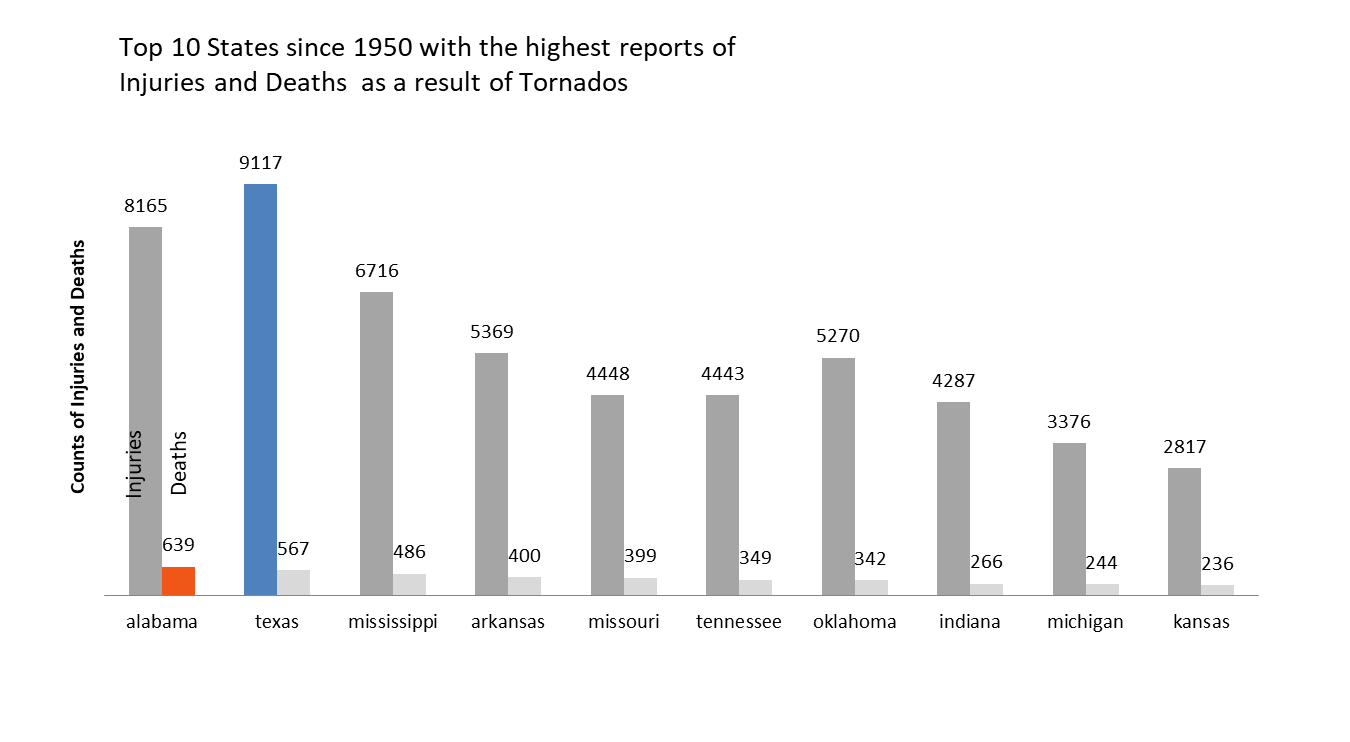

In [199]:
from IPython.display import Image
Image("ExcelChart.png")